In [33]:
import pandas as pd
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors
# Pipeline

In [15]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']

In [37]:
df = pd.DataFrame(corpus)
df = df.reset_index()
df.columns = ['username','skills']
df.username = df.username.apply(lambda x: 'user'+str(x))
df

,username,skills
0,user0,This is the first document.
1,user1,This document is the second document.
2,user2,And this is the third one.
3,user3,Is this the first document?
4,user4,This is the first document.
5,user5,This document is the second document.
6,user6,And this is the third one.
7,user7,Is this the first document?
8,user8,This is the first document.
9,user9,This document is the second document.


In [38]:
corpus = df.skills.tolist()

In [39]:
corpus

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?',
 'This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?',
 'This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [17]:
vectorizer = CountVectorizer(stop_words=stop_words)

In [18]:
_ = vectorizer.fit(corpus)

In [19]:
vectors = vectorizer.transform(corpus).toarray()
vectors

array([[1, 1, 0, 0, 0],
       [2, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [2, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [2, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0]])

In [20]:
vectorizer.get_feature_names_out()

array(['document', 'first', 'one', 'second', 'third'], dtype=object)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(vectors)
scaled_features

array([[ 0.        ,  1.        , -0.57735027, -0.57735027, -0.57735027],
       [ 1.41421356, -1.        , -0.57735027,  1.73205081, -0.57735027],
       [-1.41421356, -1.        ,  1.73205081, -0.57735027,  1.73205081],
       [ 0.        ,  1.        , -0.57735027, -0.57735027, -0.57735027],
       [ 0.        ,  1.        , -0.57735027, -0.57735027, -0.57735027],
       [ 1.41421356, -1.        , -0.57735027,  1.73205081, -0.57735027],
       [-1.41421356, -1.        ,  1.73205081, -0.57735027,  1.73205081],
       [ 0.        ,  1.        , -0.57735027, -0.57735027, -0.57735027],
       [ 0.        ,  1.        , -0.57735027, -0.57735027, -0.57735027],
       [ 1.41421356, -1.        , -0.57735027,  1.73205081, -0.57735027],
       [-1.41421356, -1.        ,  1.73205081, -0.57735027,  1.73205081],
       [ 0.        ,  1.        , -0.57735027, -0.57735027, -0.57735027]])

In [24]:
# Kmeans
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

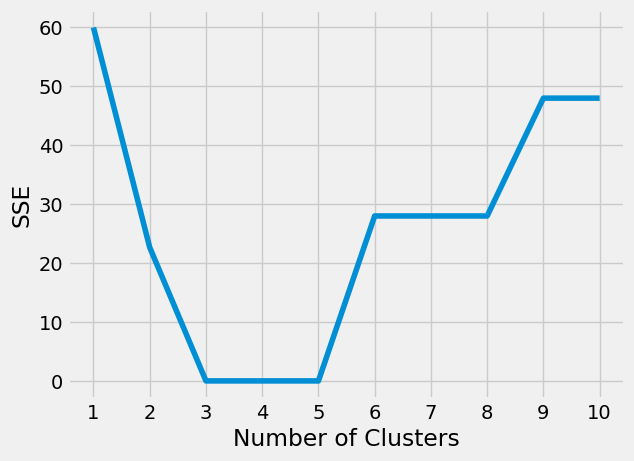

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [28]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow


3

In [29]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

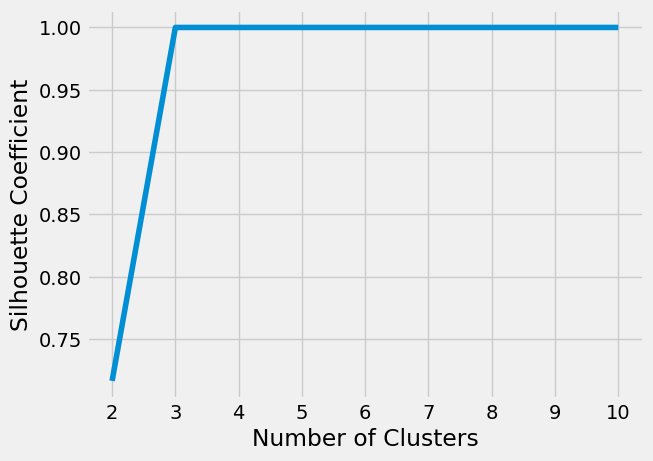

In [30]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [40]:
cluster_model = KMeans(n_clusters=3)
_ = cluster_model.fit(scaled_features)

In [42]:
df['cluster'] = cluster_model.predict(scaled_features)

In [43]:
df

,username,skills,cluster
0,user0,This is the first document.,1
1,user1,This document is the second document.,0
2,user2,And this is the third one.,2
3,user3,Is this the first document?,1
4,user4,This is the first document.,1
5,user5,This document is the second document.,0
6,user6,And this is the third one.,2
7,user7,Is this the first document?,1
8,user8,This is the first document.,1
9,user9,This document is the second document.,0


In [45]:
user1 = scaled_features[1]
user1

array([ 1.41421356, -1.        , -0.57735027,  1.73205081, -0.57735027])

In [50]:
cluster = cluster_model.predict([user1])[0]
cluster

0

In [51]:
cluster_df = df.loc[df.cluster == cluster]
cluster_df

,username,skills,cluster
1,user1,This document is the second document.,0
5,user5,This document is the second document.,0
9,user9,This document is the second document.,0


In [53]:
indices = cluster_df.index.tolist()
indices

[1, 5, 9]

In [54]:
scaled_features[indices]

array([[ 1.41421356, -1.        , -0.57735027,  1.73205081, -0.57735027],
       [ 1.41421356, -1.        , -0.57735027,  1.73205081, -0.57735027],
       [ 1.41421356, -1.        , -0.57735027,  1.73205081, -0.57735027]])

In [59]:
knn = NearestNeighbors(n_neighbors=1)
knn.fit(scaled_features[indices])
dists, idx = knn.kneighbors([user1])

In [60]:
idx[0]

array([[0]])